In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

# Simple Linear Regression
### Step 1: Data Pre-Processing

In [ ]:
df = pd.read_csv('HousePrice.csv')
df

,Area_sqm,Price_Php_M
0,75,4.35
1,90,5.76
2,87,5.52
3,65,4.12
4,46,3.78
5,89,5.59
6,102,6.12
7,76,4.28
8,120,6.83
9,118,6.55


In [ ]:
X = df.iloc[:,0]

In [ ]:
X

0     75
1     90
2     87
3     65
4     46
5     89
6    102
7     76
8    120
9    118
Name: Area_sqm, dtype: int64

In [ ]:
X = df.iloc[:, 0].values
X

array([ 75,  90,  87,  65,  46,  89, 102,  76, 120, 118])

In [ ]:
X.shape

(10,)

In [ ]:
X = df.iloc[:,0].values.reshape(-1,1)
X

array([[ 75],
       [ 90],
       [ 87],
       [ 65],
       [ 46],
       [ 89],
       [102],
       [ 76],
       [120],
       [118]])

In [ ]:
X.shape

(10, 1)

In [ ]:
y = df.iloc[:, 1].values
y

array([4.35, 5.76, 5.52, 4.12, 3.78, 5.59, 6.12, 4.28, 6.83, 6.55])

Text(0, 0.5, 'Selling Price (in million PHP)')

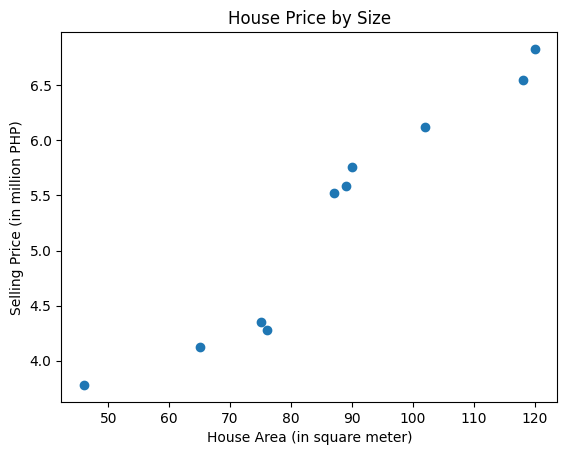

In [ ]:
plt.scatter(X,y)
plt.title("House Price by Size")
plt.xlabel("House Area (in square meter)")
plt.ylabel("Selling Price (in million PHP)")

In [ ]:
lr = LinearRegression()
model = lr.fit(X,y)

In [ ]:
model.intercept_ #y-intercept (regression constant)

1.3455824995760528

In [ ]:
model.coef_ #regression coefficien, slope

array([0.0454426])

### Formula: y = aX + b
**a** is the slope (estimated coefficient)</br>
**b** is the y-intercept

In [ ]:
X,y

(array([[ 75],
        [ 90],
        [ 87],
        [ 65],
        [ 46],
        [ 89],
        [102],
        [ 76],
        [120],
        [118]]),
 array([4.35, 5.76, 5.52, 4.12, 3.78, 5.59, 6.12, 4.28, 6.83, 6.55]))

### Step 3: Predicting

In [ ]:
y_pred = 75*model.coef_ + model.intercept_
y_pred

array([4.75377734])

In [ ]:
y_pred = 90*model.coef_ + model.intercept_
y_pred

array([5.43541631])

In [ ]:
y_pred = X*model.coef_ + model.intercept_
y_pred

array([[4.75377734],
       [5.43541631],
       [5.29908852],
       [4.29935137],
       [3.435942  ],
       [5.38997372],
       [5.98072749],
       [4.79921994],
       [6.79869425],
       [6.70780906]])

In [ ]:
y_pred.shape

(10, 1)

In [ ]:
y_pred = model.predict(X)
y_pred

array([4.75377734, 5.43541631, 5.29908852, 4.29935137, 3.435942  ,
       5.38997372, 5.98072749, 4.79921994, 6.79869425, 6.70780906])

In [ ]:
y_pred.shape

(10,)

In [ ]:
y_pred = model.predict([[75]])
y_pred

array([4.75377734])

In [ ]:
y_pred = model.predict([[80]])
y_pred

array([4.98099033])

In [ ]:
y_pred = model.predict(X)
y_pred

array([4.75377734, 5.43541631, 5.29908852, 4.29935137, 3.435942  ,
       5.38997372, 5.98072749, 4.79921994, 6.79869425, 6.70780906])

In [ ]:
model.score(X,y) #R-squared - coefficient od determination

0.9221346898586075

In [ ]:
model.coef_

array([0.0454426])

In [ ]:
import math
r = math.sqrt(model.score(X,y))
r

0.9602784439206201

In [ ]:
df.corr() #r: correlation coefficient

,Area_sqm,Price_Php_M
Area_sqm,1.000000,0.960278
Price_Php_M,0.960278,1.000000


In [ ]:
y #actual price

array([4.35, 5.76, 5.52, 4.12, 3.78, 5.59, 6.12, 4.28, 6.83, 6.55])

Text(0, 0.5, 'Selling Price (in million PHP)')

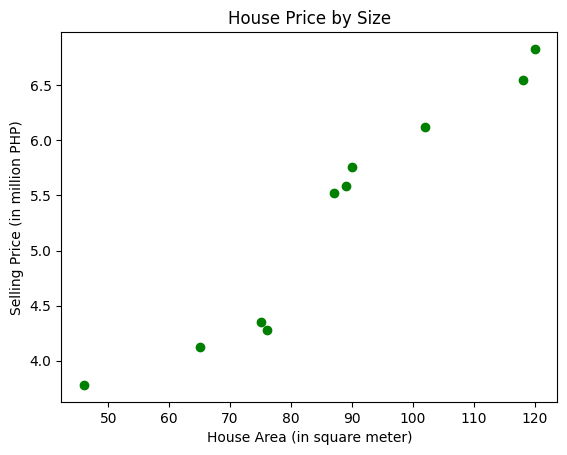

In [ ]:
plt.plot(X,y, "o", color="green")
plt.title("House Price by Size")
plt.xlabel("House Area (in square meter)")
plt.ylabel("Selling Price (in million PHP)")

Text(0, 0.5, 'Selling Price (in million PHP)')

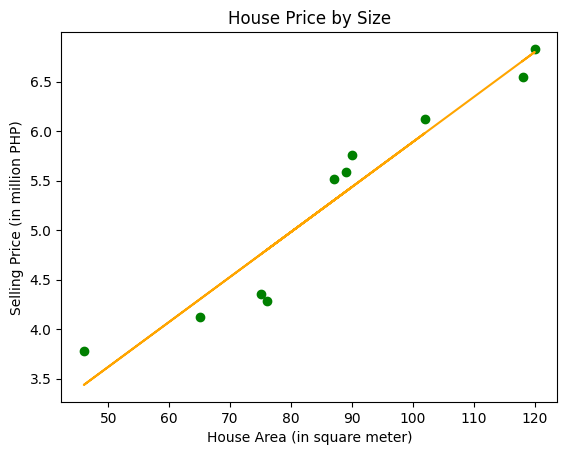

In [ ]:
plt.plot(X,y, "o", color="green")
plt.plot(X,y_pred, color="orange")
plt.title("House Price by Size")
plt.xlabel("House Area (in square meter)")
plt.ylabel("Selling Price (in million PHP)")

### Spliting Data: Training and Test Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 0)

In [ ]:
X,y

(array([[ 75],
        [ 90],
        [ 87],
        [ 65],
        [ 46],
        [ 89],
        [102],
        [ 76],
        [120],
        [118]]),
 array([4.35, 5.76, 5.52, 4.12, 3.78, 5.59, 6.12, 4.28, 6.83, 6.55]))

In [ ]:
print('X training data:\n', X_train)
print('y training data:\n', y_train)

X training data:
 [[118]
 [ 90]
 [102]
 [ 76]
 [ 65]
 [ 75]
 [ 89]]
y training data:
 [6.55 5.76 6.12 4.28 4.12 4.35 5.59]


In [ ]:
print('X training data:\n', X_test)
print('y training data:\n', y_test)

X training data:
 [[ 87]
 [120]
 [ 46]]
y training data:
 [5.52 6.83 3.78]


Text(0, 0.5, 'Selling Price (in million PHP)')

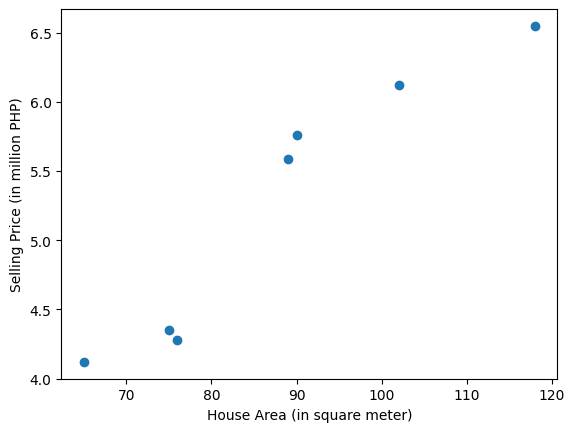

In [ ]:
plt.scatter(X_train,y_train)
plt.xlabel("House Area (in square meter)")
plt.ylabel("Selling Price (in million PHP)")

Text(0, 0.5, 'Selling Price (in million PHP)')

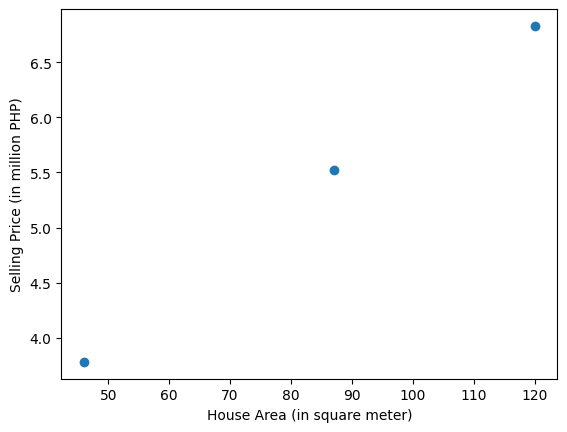

In [ ]:
plt.scatter(X_test,y_test)
plt.xlabel("House Area (in square meter)")
plt.ylabel("Selling Price (in million PHP)")

In [ ]:
model = lr.fit(X_train, y_train)
model.score(X_train, y_train) # R squared on training data

0.9130504742737192

In [ ]:
y_train_pred = model.predict(X_train)

In [ ]:
y_train_pred, y_train

(array([6.83338456, 5.36521691, 5.99443162, 4.63113309, 4.05435294,
        4.57869853, 5.31278235]),
 array([6.55, 5.76, 6.12, 4.28, 4.12, 4.35, 5.59]))

Text(0, 0.5, 'Selling Price (in million PHP)')

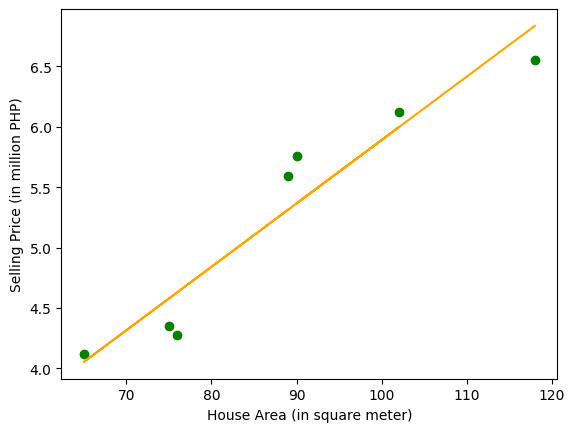

In [ ]:
plt.plot(X_train,y_train, "o", color="green")
plt.plot(X_train,y_train_pred, color="orange")
plt.xlabel("House Area (in square meter)")
plt.ylabel("Selling Price (in million PHP)")

In [ ]:
y_test_pred = model.predict(X_test)
y_test_pred, y_test

(array([5.20791324, 6.93825368, 3.05809632]), array([5.52, 6.83, 3.78]))

In [ ]:
model.score(X_test, y_test) # R squared on test data

0.8653880924501139

In [ ]:
from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE: ", mae_train)

Train Data MAE:  0.24663319327731095


In [ ]:
mae_train = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE: ", mae_train)

Test Data MAE:  0.38074803921568634


Text(0, 0.5, 'Selling Price (in million PHP)')

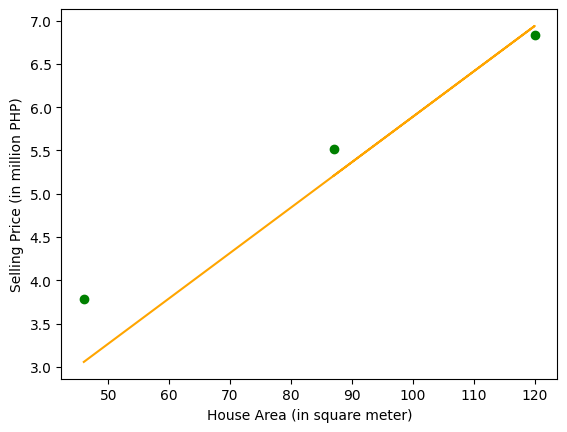

In [ ]:
plt.plot(X_test,y_test, "o", color="green")
plt.plot(X_test,y_test_pred, color="orange")
plt.xlabel("House Area (in square meter)")
plt.ylabel("Selling Price (in million PHP)")

# Multi Linear Regression

In [ ]:
df = pd.read_csv('HousePrice2.csv')
df

,Area_sqm,Bedroom,Price_Php_M
0,75,3,4.35
1,90,4,5.76
2,87,4,5.52
3,65,2,4.12
4,46,2,3.78
5,89,2,5.59
6,102,3,6.12
7,76,2,4.28
8,120,3,6.83
9,118,4,6.55


In [ ]:
features = df.iloc[:, :-1]
features

,Area_sqm,Bedroom
0,75,3
1,90,4
2,87,4
3,65,2
4,46,2
5,89,2
6,102,3
7,76,2
8,120,3
9,118,4


In [ ]:
X = features.values
X

array([[ 75,   3],
       [ 90,   4],
       [ 87,   4],
       [ 65,   2],
       [ 46,   2],
       [ 89,   2],
       [102,   3],
       [ 76,   2],
       [120,   3],
       [118,   4],
       [ 77,   2],
       [ 88,   2],
       [ 87,   4],
       [ 60,   2],
       [ 46,   1],
       [ 90,   4],
       [105,   5],
       [ 78,   3],
       [117,   5],
       [112,   4]])

In [ ]:
y = df['Price_Php_M'].values
y


array([4.35, 5.76, 5.52, 4.12, 3.78, 5.59, 6.12, 4.28, 6.83, 6.55, 4.25,
       4.95, 5.35, 4.25, 3.78, 5.65, 6.15, 4.32, 5.88, 5.86])

In [ ]:
import seaborn as sb

/Users/yujimoronaga/miniconda3/envs/thesis/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


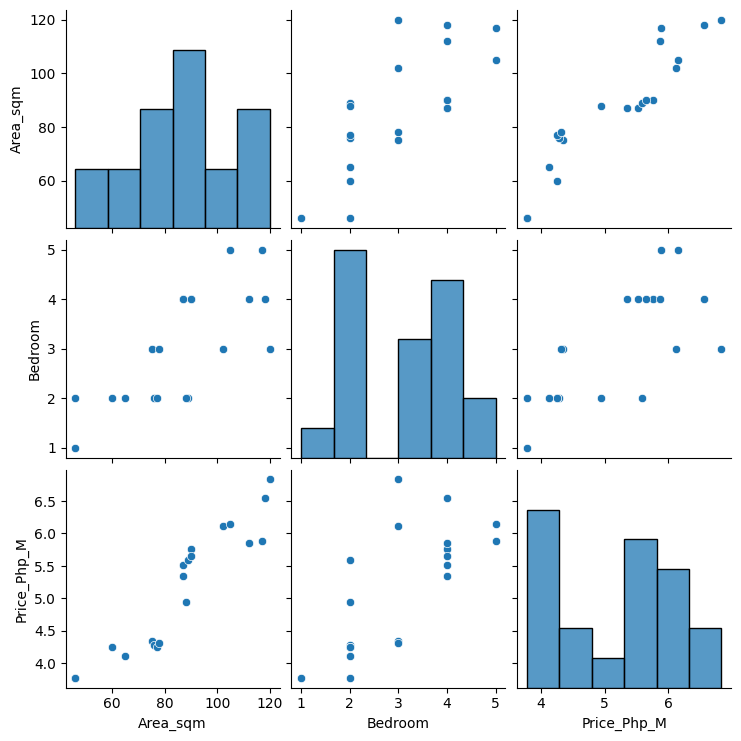

In [ ]:
sb.pairplot(df)

In [ ]:
df.corr()

,Area_sqm,Bedroom,Price_Php_M
Area_sqm,1.000000,0.729164,0.929703
Bedroom,0.729164,1.000000,0.712354
Price_Php_M,0.929703,0.712354,1.000000


<Axes: >

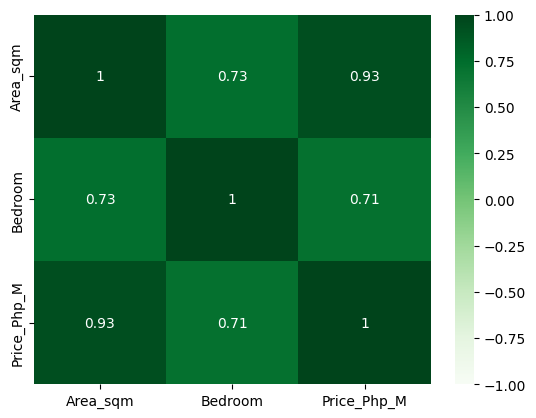

In [ ]:
 sb.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center=0, cmap='Greens')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 2)

In [ ]:
X_train, X_test, y_train, y_test

(array([[ 46,   2],
        [ 78,   3],
        [ 76,   2],
        [ 90,   4],
        [ 60,   2],
        [ 75,   3],
        [112,   4],
        [117,   5],
        [118,   4],
        [ 90,   4],
        [120,   3],
        [ 87,   4],
        [ 88,   2],
        [ 89,   2]]),
 array([[ 65,   2],
        [105,   5],
        [102,   3],
        [ 77,   2],
        [ 87,   4],
        [ 46,   1]]),
 array([3.78, 4.32, 4.28, 5.76, 4.25, 4.35, 5.86, 5.88, 6.55, 5.65, 6.83,
        5.35, 4.95, 5.59]),
 array([4.12, 6.15, 6.12, 4.25, 5.52, 3.78]))

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_pred = lr.predict(X_train)
y_train_pred

array([4.2205695 , 4.66627973, 5.47671194, 4.86721198, 4.62913721,
       6.19763947, 3.3510719 , 5.36528439, 5.07484744, 5.75863244,
       6.29384737, 4.0348569 , 5.47671194, 6.42719779])

In [ ]:
lr.score(X_train, y_train)

0.8783158181111279

In [ ]:
y_test_pred = lr.predict(X_test)
y_test_pred

array([5.36528439, 3.51486163, 6.6433497 , 4.75578442, 6.51670248,
       5.11198996])

In [ ]:
print('Predictive ccuracy (R-squared): ', lr.score(X_test, y_test))

Predictive ccuracy (R-squared):  0.797912943684734


In [ ]:
#predict new data
new_data = np.array([[100, 5]])
lr.predict(new_data)

ValueError: X has 2 features, but LinearRegression is expecting 6 features as input.

In [ ]:
#predict new data
new_data = np.array([[200, 10]])
price = lr.predict(new_data)
print("Predicted Selling Price for a 70sqm house with 3BR is PHP{:.2f}M".format(price[0]))

In [ ]:
mae_test = mean_absolute_error(y_test, y_test_pred)
print("with mean absolute error of Php{:.3f}M".format(mae_test))

with mean absolute error of Php0.327M


### MultiLinear Regression with Building floor no.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import seaborn as sb

lr = LinearRegression()

In [6]:
df = pd.read_csv('up.csv')
df

,AreaSQM,Floors,Bedrooms,Bathrooms,Carport,Yard,Price_Php_M
0,200,2,4,4,2,1,12.00
1,102,1,3,2,1,0,6.12
2,80,1,2,1,1,0,4.00
3,49,1,2,1,1,0,2.50
4,85,1,3,1,1,0,4.35
...,...,...,...,...,...,...,...
57,65,1,3,1,1,0,4.12
58,89,1,3,1,1,0,5.59
59,150,2,3,2,2,0,8.70
60,225,1,4,3,1,0,9.50


In [7]:
features = df.iloc[:, :-1]
features

,AreaSQM,Floors,Bedrooms,Bathrooms,Carport,Yard
0,200,2,4,4,2,1
1,102,1,3,2,1,0
2,80,1,2,1,1,0
3,49,1,2,1,1,0
4,85,1,3,1,1,0
...,...,...,...,...,...,...
57,65,1,3,1,1,0
58,89,1,3,1,1,0
59,150,2,3,2,2,0
60,225,1,4,3,1,0


In [8]:
X = features.values
X

array([[200,   2,   4,   4,   2,   1],
       [102,   1,   3,   2,   1,   0],
       [ 80,   1,   2,   1,   1,   0],
       [ 49,   1,   2,   1,   1,   0],
       [ 85,   1,   3,   1,   1,   0],
       [240,   1,   3,   2,   1,   1],
       [200,   2,   4,   2,   2,   0],
       [500,   2,   6,   4,   3,   1],
       [160,   2,   4,   2,   1,   0],
       [312,   2,   4,   4,   2,   1],
       [100,   2,   4,   3,   1,   0],
       [105,   1,   2,   1,   1,   0],
       [431,   1,   3,   3,   1,   1],
       [300,   1,   7,   5,   1,   1],
       [ 94,   1,   4,   3,   1,   1],
       [108,   1,   3,   1,   1,   0],
       [180,   2,   4,   2,   2,   0],
       [ 60,   2,   2,   2,   1,   0],
       [ 46,   1,   2,   1,   1,   0],
       [390,   2,   5,   5,   3,   1],
       [ 99,   2,   3,   2,   1,   0],
       [250,   1,   4,   3,   1,   1],
       [113,   1,   2,   2,   1,   0],
       [140,   2,   3,   2,   1,   0],
       [ 90,   1,   2,   1,   1,   0],
       [120,   2,   4,   

In [9]:
y = df['Price_Php_M'].values
y

array([12.  ,  6.12,  4.  ,  2.5 ,  4.35, 10.5 , 12.  , 23.  ,  8.99,
       17.5 ,  6.5 ,  4.8 , 19.  , 18.7 ,  6.2 ,  4.9 ,  9.5 ,  4.  ,
        3.78, 18.  ,  5.9 , 13.3 ,  4.2 ,  7.7 ,  5.1 ,  8.83, 22.  ,
        6.76, 16.5 ,  8.75, 15.  ,  6.1 ,  4.78, 16.  , 14.  , 12.7 ,
        5.  ,  6.55,  4.4 , 14.5 , 20.  ,  6.5 , 11.  ,  5.5 ,  5.52,
       17.  ,  9.5 , 20.  , 20.  ,  4.28,  5.75, 20.  ,  4.05,  4.8 ,
       22.5 , 10.  ,  4.35,  4.12,  5.59,  8.7 ,  9.5 ,  4.25])

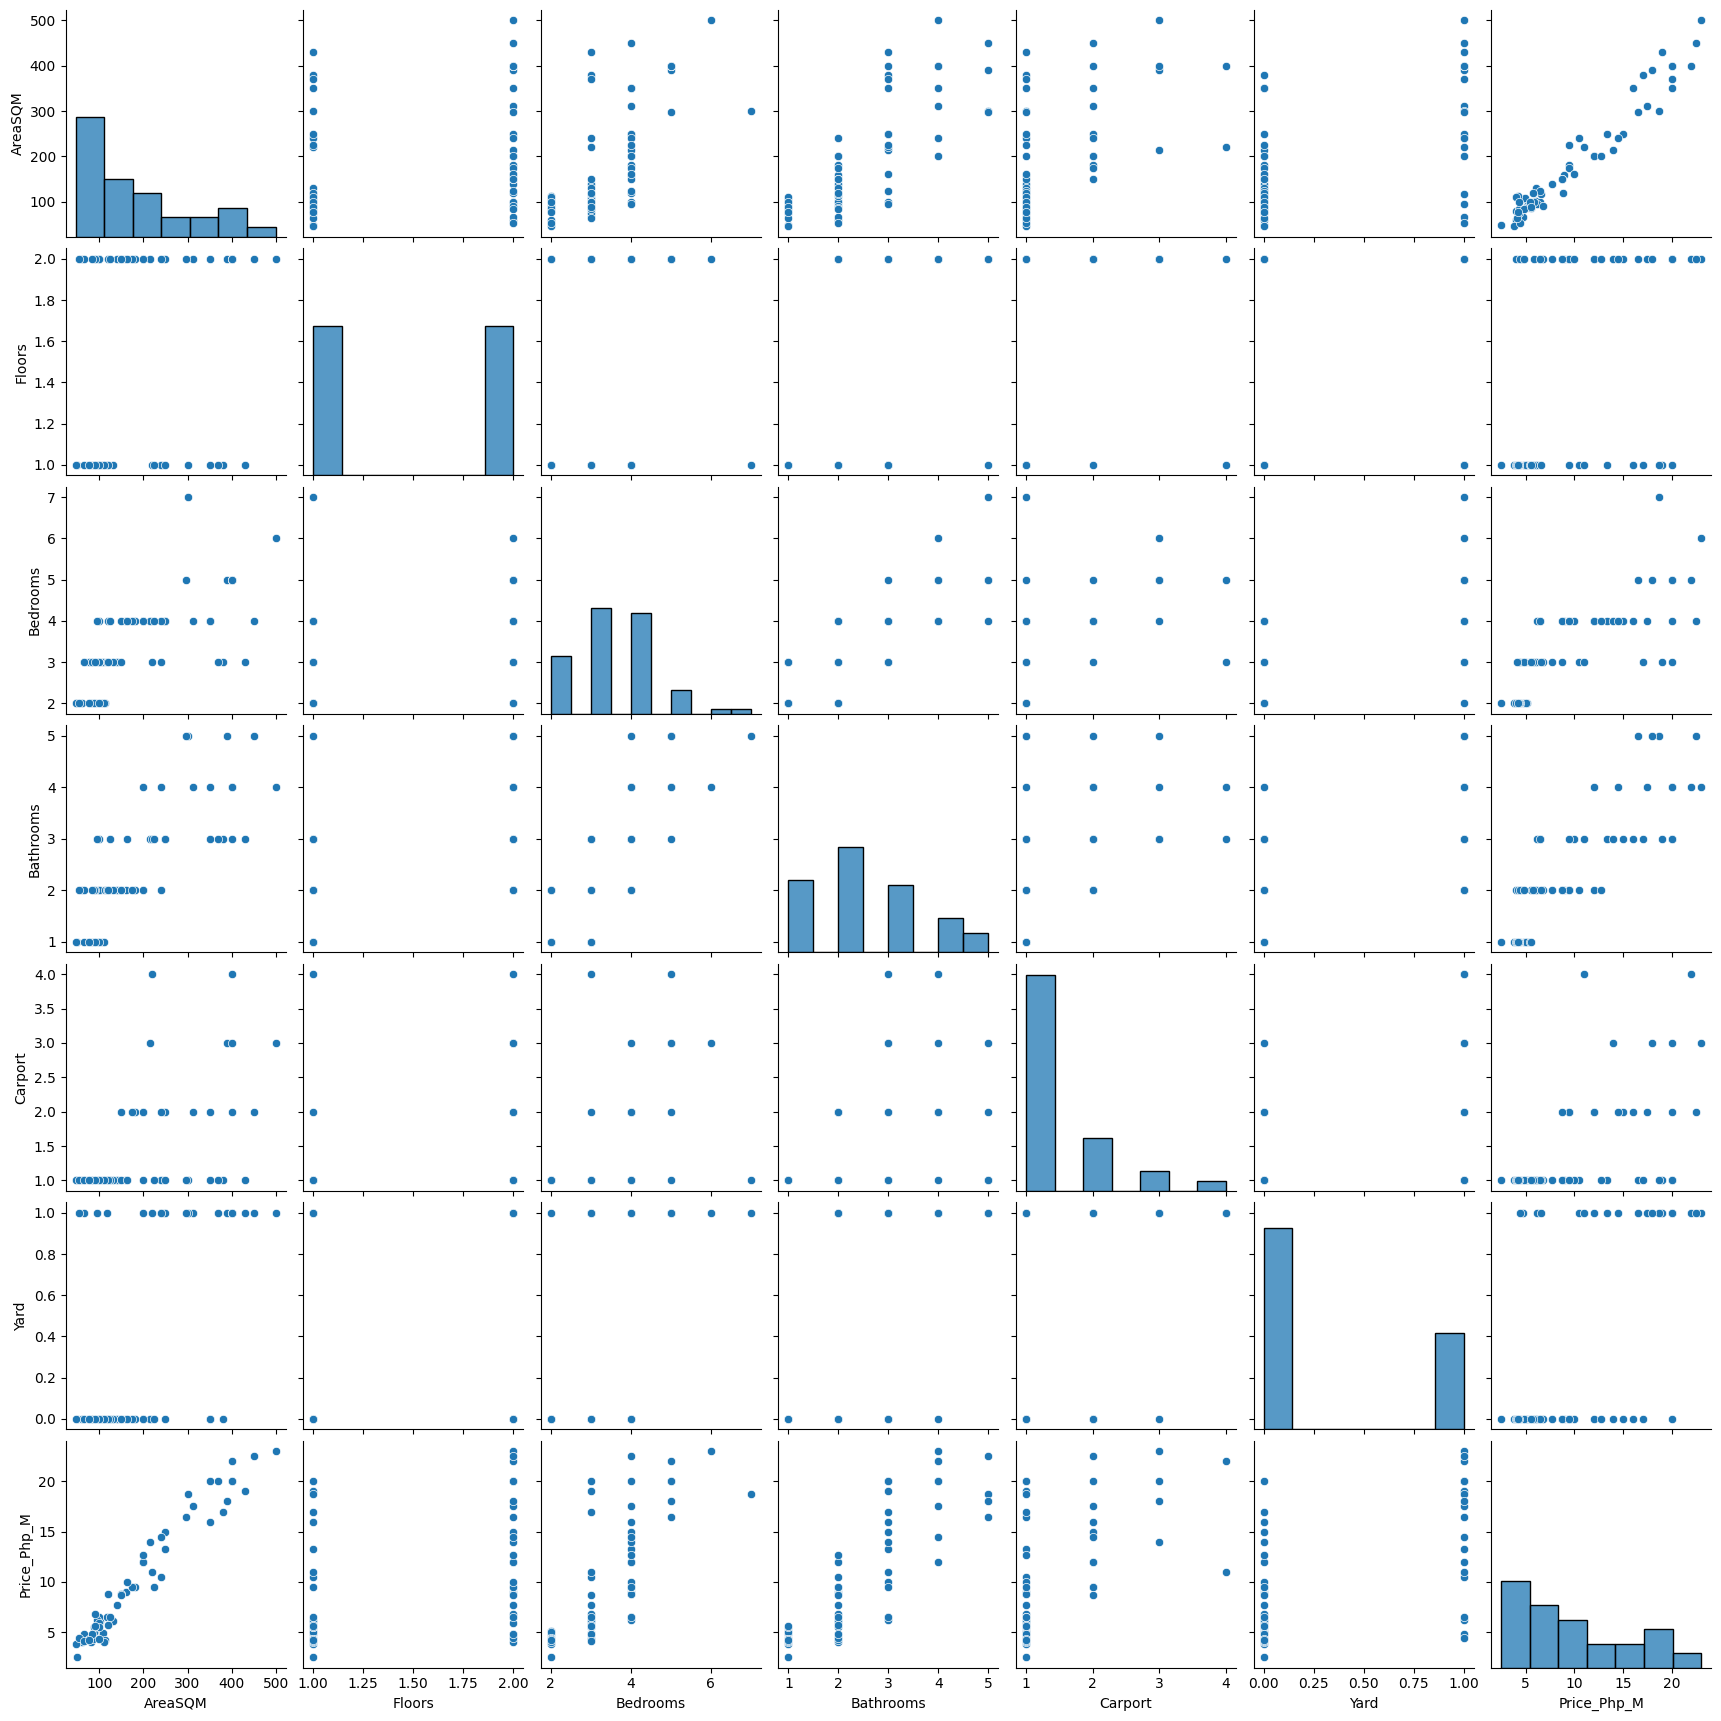

In [10]:
sb.pairplot(df)

In [11]:
df.corr()

,AreaSQM,Floors,Bedrooms,Bathrooms,Carport,Yard,Price_Php_M
AreaSQM,1.000000,0.258071,0.670019,0.788039,0.561716,0.580296,0.973711
Floors,0.258071,1.000000,0.465130,0.460246,0.365359,0.138013,0.365288
Bedrooms,0.670019,0.465130,1.000000,0.784507,0.465168,0.451498,0.740908
Bathrooms,0.788039,0.460246,0.784507,1.000000,0.481685,0.654448,0.837912
Carport,0.561716,0.365359,0.465168,0.481685,1.000000,0.410810,0.574306
Yard,0.580296,0.138013,0.451498,0.654448,0.410810,1.000000,0.593804
Price_Php_M,0.973711,0.365288,0.740908,0.837912,0.574306,0.593804,1.000000


<Axes: >

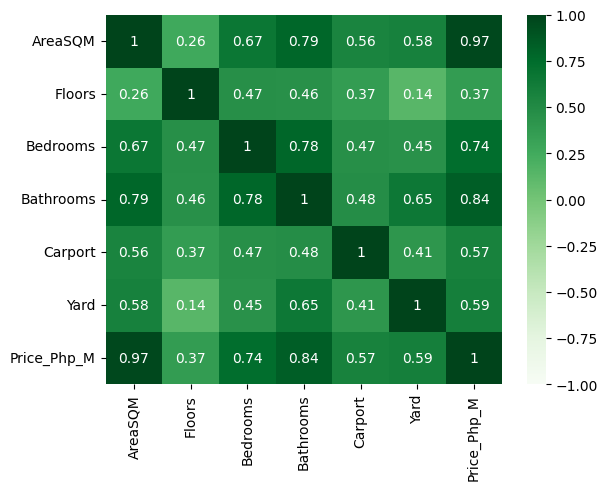

In [12]:
 sb.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center=0, cmap='Greens')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 2)
X_train, X_test, y_train, y_test

(array([[110,   1,   2,   1,   1,   0],
        [ 60,   2,   2,   2,   1,   0],
        [225,   1,   4,   3,   1,   0],
        [100,   1,   2,   1,   1,   0],
        [162,   2,   4,   3,   1,   0],
        [431,   1,   3,   3,   1,   1],
        [ 94,   1,   4,   3,   1,   1],
        [ 87,   1,   3,   2,   1,   0],
        [180,   2,   4,   2,   2,   0],
        [ 80,   1,   2,   1,   1,   0],
        [120,   2,   4,   2,   1,   0],
        [390,   2,   5,   5,   3,   1],
        [175,   2,   4,   2,   2,   0],
        [200,   2,   4,   2,   2,   0],
        [220,   1,   3,   3,   4,   1],
        [ 90,   1,   2,   1,   1,   0],
        [240,   1,   3,   2,   1,   1],
        [124,   2,   4,   3,   1,   0],
        [350,   1,   4,   3,   2,   0],
        [ 83,   2,   3,   2,   1,   0],
        [ 85,   1,   3,   1,   1,   0],
        [ 53,   2,   2,   2,   1,   1],
        [ 49,   1,   2,   1,   1,   0],
        [240,   2,   4,   4,   2,   1],
        [118,   1,   3,   2,   1,   1],


In [14]:
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
lr.score(X_train, y_train)

0.9785181795265449

In [16]:
y_test_pred = lr.predict(X_test)
y_test_pred

array([ 4.22340383, 11.75064797, 16.72074623,  3.71672478,  7.92279354,
       20.21975804, 10.62441743, 15.61002493, 16.37264041,  5.52260755,
        5.27811465, 13.09807749,  8.7176868 ,  5.96651127, 16.13272027,
        6.82559386, 15.2776678 ,  4.65574027,  8.66813515])

In [17]:
print('Predictive Accuracy (R-squared): ', lr.score(X_test, y_test))

Predictive Accuracy (R-squared):  0.9201542013291124


In [20]:
#predict new data
new_data = np.array([[150,2,2,3,1,0]])
lr.predict(new_data)

array([8.07370583])

In [19]:
#predict new data
new_data = np.array([[120,2,3,2,2,0]])
price = lr.predict(new_data)
print("Predicted Selling Price for a 120sqm house with 2flrs and 3BR is PHP{:.2f}M".format(price[0]))

Predicted Selling Price for a 120sqm house with 2flrs and 3BR is PHP7.54M
